In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
n = 100
d = 5
split_size = 0.2 # proportion of datapoints for test set

f = lambda x: (5*(x[0]**3)) + (2*(x[1]**2)) + (0.07*x[2])

X_train = np.random.normal(size=(int(n*(1-split_size)),d))
X_test = np.random.normal(size=(int(n*split_size),d))
y_train = np.array([f(x) for x in X_train])
y_test = np.array([f(x) for x in X_test])

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 5), (20, 5), (80,), (20,))

In [34]:
X_train[0]

array([-0.30965703, -0.13007185, -1.4235946 ,  1.37669383,  0.81963767])

In [35]:
y_train[0]

-0.21427540189820649

In [36]:
def mnorm(x, z, M, squared=True): # (n, d), (m,d), (d,d) --> (n, m)
    # implements |x-z|_M^2 between pairs from x and z
    x_norm = ((x @ M)*x).sum(axis=1, keepdims=True)
    if x is z:
        z_norm = x_norm
    else:
        z_norm = ((z @ M)*z).sum(axis=1, keepdims=True)
    distances = (x @ (M @ z.T)*-2) + x_norm + z_norm
    if not squared:
        distances = np.sqrt(np.clip(distances, 0, np.inf))
    return distances

In [37]:
M = np.eye(d)

mnorm(X_train, X_train, M, squared=False)

array([[0.00000000e+00, 3.46607522e+00, 3.68134523e+00, ...,
        3.12129150e+00, 3.22020531e+00, 3.43684025e+00],
       [2.69187468e+00, 0.00000000e+00, 1.56598268e+00, ...,
        3.05071451e+00, 2.29835476e+00, 1.91273045e+00],
       [3.67052166e+00, 2.67211836e+00, 0.00000000e+00, ...,
        2.98013122e+00, 2.16192921e+00, 2.32477101e+00],
       ...,
       [2.88486949e+00, 3.55729653e+00, 2.74604568e+00, ...,
        0.00000000e+00, 1.88013035e+00, 2.47795805e+00],
       [2.68967409e+00, 2.62955267e+00, 1.27205967e+00, ...,
        1.34888963e+00, 0.00000000e+00, 1.72006402e+00],
       [2.53846481e+00, 1.74870199e+00, 3.40685129e-01, ...,
        1.48060710e+00, 8.52014355e-01, 2.98023224e-08]])

In [42]:
def K_M(x, z, M, L):
    pairwise_distances = mnorm(x, z, M, squared=False)
    pairwise_distances = np.clip(pairwise_distances, 0, np.inf)
    return np.exp(pairwise_distances * -(1/L))

def grad_laplace_mat(x, z, M, L): # (n, d), (m, d), (d, d) --> (n, m, d)
    nm_factor = np.where(
        mnorm(x, z, M) < 1e-4, 0, K_M(x, z, M, L)/mnorm(x, z, M, squared=False)/L)
    np.fill_diagonal(nm_factor, 0.)
    return ((z @ M) - (x @ M)[:,None,:]) * nm_factor[:,:,None]

In [49]:
T = 5
L = 10
M = np.eye(d)

for t in range(T):
    K_train = K_M(X_train, X_train, M, L=L)
    alpha = np.linalg.solve(K_train, y_train)
    grad = grad_laplace_mat(X_train, X_train, M, L=L)
    M = np.mean(np.swapaxes(grad, 1, 2) @ grad, axis=0)

/var/folders/mc/421h_39x625fpy09_jss5vrh0000gn/T/ipykernel_79221/511340249.py:8: RuntimeWarning: divide by zero encountered in true_divide
  mnorm(x, z, M) < 1e-4, 0, K_M(x, z, M, L)/mnorm(x, z, M, squared=False)/L)


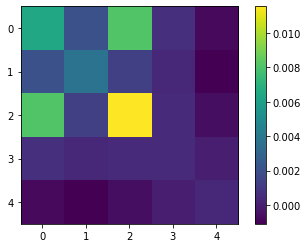

In [50]:
plt.imshow(M)
plt.colorbar()